let's move on to the **Random Forest** examples. Random Forests are an evolution of bagging specifically for decision trees, incorporating an additional layer of randomness by selecting a random subset of features at each split.

---

**B. Random Forest Examples (`RandomForestClassifier` & `RandomForestRegressor`)**

**Example 1 (RandomForestClassifier): Iris Dataset - Basic Usage, OOB Score, and Feature Importance**

We'll use the Iris dataset to demonstrate `RandomForestClassifier`, its Out-of-Bag (OOB) score, and how to extract feature importances.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# --- 1. Load Iris Dataset ---
iris = load_iris()
X, y = iris.data, iris.target
feature_names = iris.feature_names
target_names = iris.target_names

X_df = pd.DataFrame(X, columns=feature_names)
print("Iris Dataset Loaded for Random Forest Classifier.")

Iris Dataset Loaded for Random Forest Classifier.


In [3]:
# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y, test_size=0.3, random_state=42, stratify=y
)
# Note: Feature scaling is not strictly necessary for Random Forests.


In [4]:
# --- 3. Instantiate and Train Random Forest Classifier ---
print("\n--- Random Forest Classifier (Iris Dataset) ---")
# Key RandomForestClassifier parameters:
#   n_estimators: Number of trees in the forest.
#   max_features: Number of features to consider when looking for the best split ('sqrt', 'log2', int, float). Default is 'sqrt'.
#   max_depth: Maximum depth of the tree.
#   min_samples_split: Minimum number of samples required to split an internal node.
#   min_samples_leaf: Minimum number of samples required to be at a leaf node.
#   bootstrap: Whether bootstrap samples are used (default=True).
#   oob_score: Whether to use out-of-bag samples to estimate the generalization score (default=False).
#   random_state: For reproducibility.
#   n_jobs: Number of jobs to run in parallel (-1 uses all processors).

rf_clf = RandomForestClassifier(
    n_estimators=100,     # Number of trees
    random_state=42,
    oob_score=True,       # Enable OOB scoring
    max_features='sqrt',  # Default, good starting point
    n_jobs=-1
)
rf_clf.fit(X_train, y_train)


--- Random Forest Classifier (Iris Dataset) ---


RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)


Random Forest Classifier Test Accuracy: 0.8889
Random Forest Classifier OOB Score: 0.9524

Confusion Matrix (Random Forest):


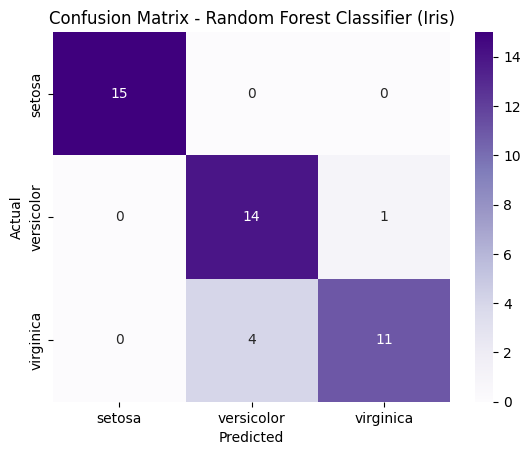


Classification Report (Random Forest):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.78      0.93      0.85        15
   virginica       0.92      0.73      0.81        15

    accuracy                           0.89        45
   macro avg       0.90      0.89      0.89        45
weighted avg       0.90      0.89      0.89        45



In [5]:
# --- 4. Make Predictions and Evaluate ---
y_pred_rf_clf = rf_clf.predict(X_test)
accuracy_rf_clf = accuracy_score(y_test, y_pred_rf_clf)

print(f"\nRandom Forest Classifier Test Accuracy: {accuracy_rf_clf:.4f}")
if hasattr(rf_clf, 'oob_score_'):
    print(f"Random Forest Classifier OOB Score: {rf_clf.oob_score_:.4f}")

print("\nConfusion Matrix (Random Forest):")
cm_rf_clf = confusion_matrix(y_test, y_pred_rf_clf)
sns.heatmap(cm_rf_clf, annot=True, fmt="d", cmap="Purples", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest Classifier (Iris)")
plt.show()

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf_clf, target_names=target_names))



Feature Importances from Random Forest:
             feature  importance
3   petal width (cm)    0.454892
2  petal length (cm)    0.400227
0  sepal length (cm)    0.120608
1   sepal width (cm)    0.024273


C:\Users\king\AppData\Local\Temp\ipykernel_18104\1858238290.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df, palette="viridis")


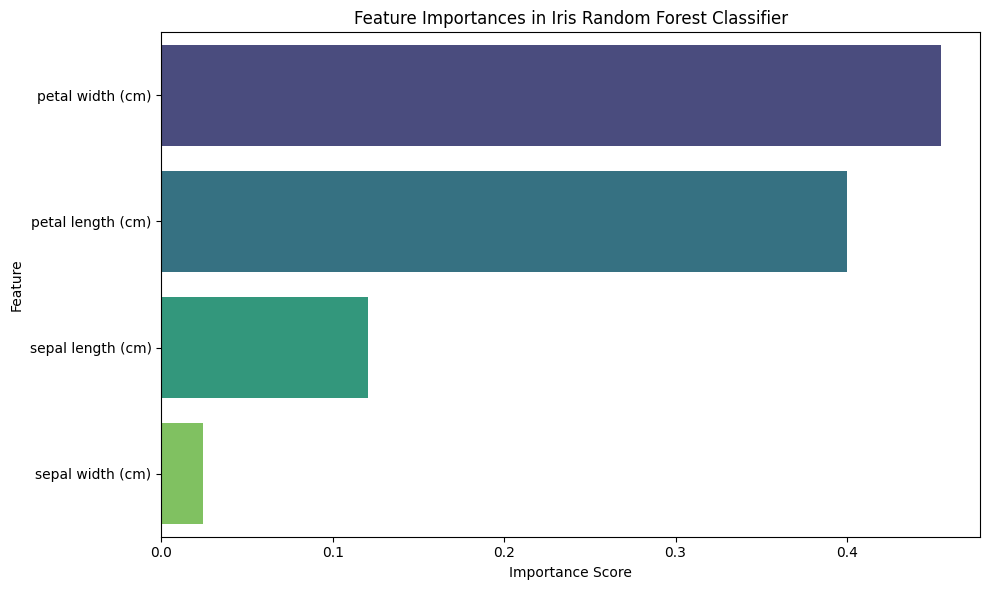

In [6]:
# --- 5. Feature Importances ---
importances = rf_clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("\nFeature Importances from Random Forest:")
print(feature_importance_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df, palette="viridis")
plt.title('Feature Importances in Iris Random Forest Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


**Discussion for RandomForestClassifier Example (Iris):**
* **Performance:** Random Forests usually perform very well, often better or more stably than a single decision tree.
* **OOB Score:** The `oob_score_` gives an unbiased estimate of the model's accuracy on unseen data using the out-of-bag samples. It's often close to the test set accuracy if the dataset is reasonably sized.
* **Feature Importances:** The `feature_importances_` attribute shows the relative importance of each feature in making predictions. For the Iris dataset, you'll likely see that petal length and petal width are the most important features, which aligns with common EDA findings for this dataset.

---

**Example 2 (RandomForestRegressor): `make_friedman1` Dataset**

We'll use the `make_friedman1` dataset from Scikit-learn. This synthetic dataset is designed for regression tasks and has a known non-linear relationship. By default, it generates 10 features, but only the first 5 are actually used in the formula to generate the target variable, making it interesting for observing feature importances.


In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_friedman1 # Corrected: Added this import
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# --- 1. Generate make_friedman1 Dataset ---
# n_features=10 by default, only first 5 are informative
X_friedman, y_friedman = make_friedman1(n_samples=500, n_features=10, random_state=42)

# Create feature names for clarity
feature_names_friedman = [f"feature_{i+1}" for i in range(X_friedman.shape[1])]
X_df_friedman = pd.DataFrame(X_friedman, columns=feature_names_friedman)

print("\nmake_friedman1 Dataset Generated for Random Forest Regressor.")
print(f"Features shape: {X_df_friedman.shape}, Target shape: {y_friedman.shape}")



make_friedman1 Dataset Generated for Random Forest Regressor.
Features shape: (500, 10), Target shape: (500,)


In [11]:
# --- 2. Split Data ---
X_train_fr, X_test_fr, y_train_fr, y_test_fr = train_test_split(
    X_df_friedman, y_friedman, test_size=0.3, random_state=42
)

In [12]:
# --- 3. Instantiate and Train Random Forest Regressor ---
# (Optional: GridSearchCV for hyperparameter tuning)
# For this example, we'll use some reasonable defaults and then show feature importances.
# In a real project, tuning n_estimators, max_features, max_depth, etc., is recommended.

print("\n--- Random Forest Regressor (make_friedman1 Dataset) ---")
rf_reg = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    oob_score=True,
    max_features='sqrt', # Common choice: sqrt(n_features) or 1/3 of features for regression
                         # For 10 features, sqrt(10) is ~3. Let's try around 1/3, so ~3-4.
                         # Let's be explicit: max_features=4
    max_depth=10,      # Limiting depth can sometimes help
    min_samples_leaf=5, # Prevent leaves with too few samples
    n_jobs=-1
)
rf_reg.fit(X_train_fr, y_train_fr)



--- Random Forest Regressor (make_friedman1 Dataset) ---


RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=5,
                      n_jobs=-1, oob_score=True, random_state=42)

In [14]:
# --- 4. Make Predictions and Evaluate ---
y_pred_rf_reg = rf_reg.predict(X_test_fr)
mse_rf_reg = mean_squared_error(y_test_fr, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test_fr, y_pred_rf_reg)

print(f"\nRandom Forest Regressor Test MSE: {mse_rf_reg:.4f}")
print(f"Random Forest Regressor Test R2 Score: {r2_rf_reg:.4f}")
if hasattr(rf_reg, 'oob_score_') and rf_reg.oob_score_ is not None: # Check if oob_score was computed and not None
    print(f"Random Forest Regressor OOB Score (R2): {rf_reg.oob_score_:.4f}")



Random Forest Regressor Test MSE: 5.2534
Random Forest Regressor Test R2 Score: 0.7265
Random Forest Regressor OOB Score (R2): 0.7926



Feature Importances from Random Forest Regressor:
      feature  importance
3   feature_4    0.288673
0   feature_1    0.259199
1   feature_2    0.167904
4   feature_5    0.140918
2   feature_3    0.060679
7   feature_8    0.018398
6   feature_7    0.017224
9  feature_10    0.016517
8   feature_9    0.015621
5   feature_6    0.014866


C:\Users\king\AppData\Local\Temp\ipykernel_18104\3683075315.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df_reg, palette="mako")


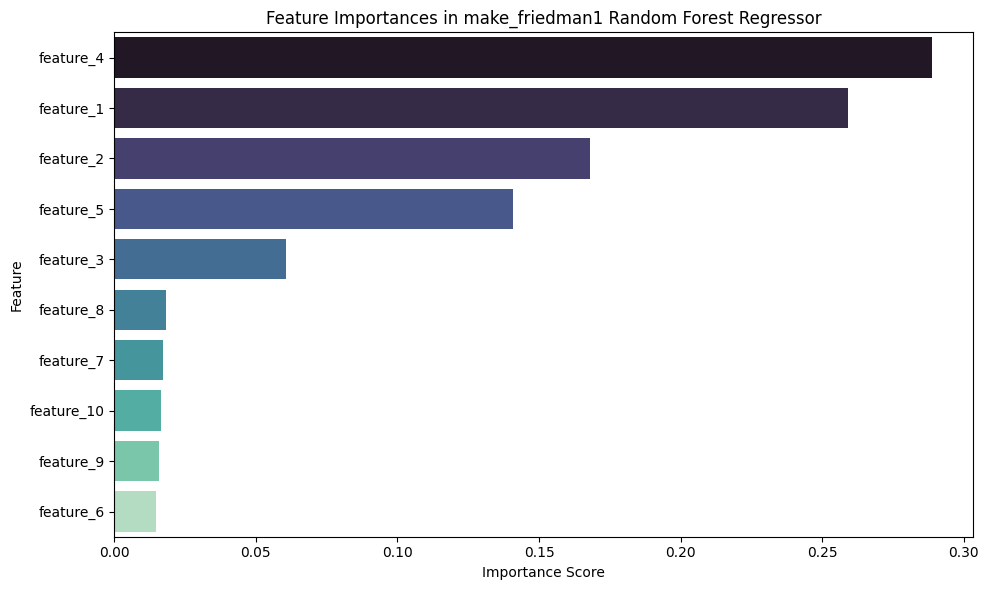

In [15]:
# --- 5. Feature Importances ---
importances_reg = rf_reg.feature_importances_
feature_importance_df_reg = pd.DataFrame({
    'feature': feature_names_friedman,
    'importance': importances_reg
}).sort_values('importance', ascending=False)

print("\nFeature Importances from Random Forest Regressor:")
print(feature_importance_df_reg)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df_reg, palette="mako")
plt.title('Feature Importances in make_friedman1 Random Forest Regressor')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

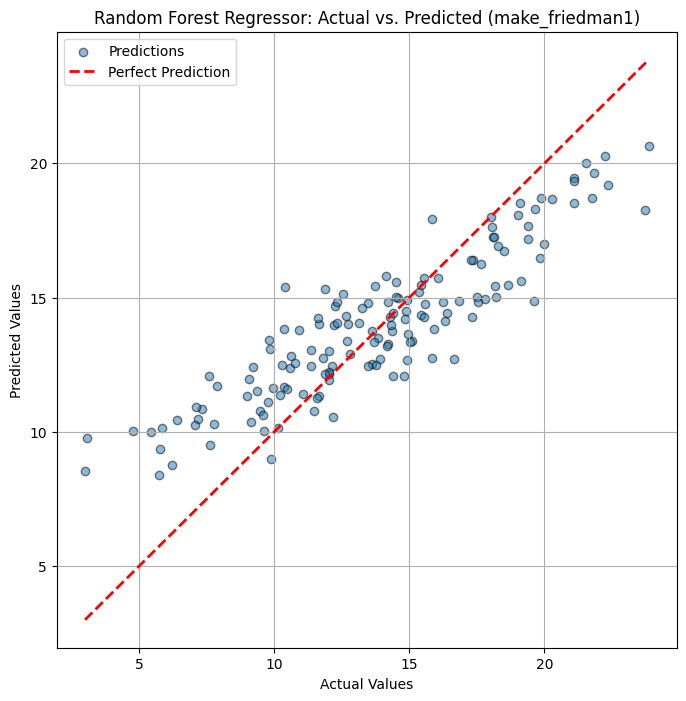

In [16]:
# --- 6. Plot Actual vs. Predicted Values ---
plt.figure(figsize=(8, 8))
plt.scatter(y_test_fr, y_pred_rf_reg, alpha=0.5, edgecolors='k', label='Predictions')
plt.plot([y_test_fr.min(), y_test_fr.max()], [y_test_fr.min(), y_test_fr.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest Regressor: Actual vs. Predicted (make_friedman1)")
plt.legend()
plt.grid(True)
plt.show()

**Discussion for RandomForestRegressor Example (`make_friedman1`):**
* The `make_friedman1` dataset is designed such that only the first 5 out of 10 (by default) features are informative.
* **Feature Importances:** You should observe that the `feature_importances_` attribute of the trained `RandomForestRegressor` assigns higher importance scores to the first few features (feature_1 to feature_5) and lower scores to the remaining irrelevant features. This demonstrates Random Forest's ability to identify relevant predictors.
* **Performance:** The model should achieve a reasonable R2 score, capturing the non-linear relationship defined by the Friedman function.
* **OOB Score:** Provides a good estimate of the model's generalization on this regression task.
* The actual vs. predicted plot gives a visual assessment of the regression quality.

These examples for Bagging and Random Forests demonstrate their setup, key parameters, and some of their useful properties like OOB scoring and feature importance extraction.